In [1]:
%matplotlib inline

In [2]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the MNIST dataset from Keras

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

Sample data


AxesImage(54,36;334.8x217.44)
5


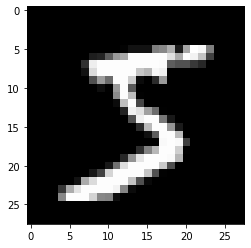

In [4]:
print(plt.imshow(x_train[0],cmap='gray',interpolation='antialiased'))
print(y_train[0])

Reshape the 2D vector into a 1D vector

In [5]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

Normalize Data

In [6]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255
x_test=x_test/255

One Hot Encoding the Targets

In [7]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

Developing the Neural Network

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,Activation

model=Sequential()

Input Layer

In [9]:
model.add(Dense(784,input_shape=(784,),activation='relu'))
model.add(Dropout(0.1))

Hidden Layer 1

In [10]:
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

Hidden Layer 2


In [11]:
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

Hidden Layer 3

In [12]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))

Output Layer

In [13]:
model.add(Dense(10,activation='softmax'))

Training the Model

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train,batch_size=128,epochs=32,use_multiprocessing=True)

Epoch 1/32
469/469 [==============================] - 12s 25ms/step - loss: 0.3224 - accuracy: 0.9040
Epoch 2/32
469/469 [==============================] - 12s 25ms/step - loss: 0.1190 - accuracy: 0.9656
Epoch 3/32
469/469 [==============================] - 12s 25ms/step - loss: 0.0878 - accuracy: 0.9753
Epoch 4/32
469/469 [==============================] - 12s 25ms/step - loss: 0.0692 - accuracy: 0.9805
Epoch 5/32
469/469 [==============================] - 12s 25ms/step - loss: 0.0579 - accuracy: 0.9839
Epoch 6/32
469/469 [==============================] - 12s 25ms/step - loss: 0.0486 - accuracy: 0.9859
Epoch 7/32
469/469 [==============================] - 12s 25ms/step - loss: 0.0408 - accuracy: 0.9884
Epoch 8/32
469/469 [==============================] - 12s 25ms/step - loss: 0.0375 - accuracy: 0.9886
Epoch 9/32
469/469 [==============================] - 12s 25ms/step - loss: 0.0338 - accuracy: 0.9901
Epoch 10/32
469/469 [==============================] - 12s 25ms/step - loss: 0.029

Evaluation of Model

In [17]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0992 - accuracy: 0.9847
Test score: 0.09922144562005997
Test accuracy: 0.9847000241279602


In [18]:
y_pred=model.predict(x_test)

In [19]:
y_pred=np.argmax(y_pred,axis=1)

In [20]:
y_test=np.argmax(y_test,axis=1)

In [26]:
from sklearn.metrics import confusion_matrix

c_mat=confusion_matrix(y_test,y_pred,labels=[i for i in range(10)])
c_mat

array([[ 969,    1,    0,    1,    1,    1,    0,    3,    1,    3],
       [   0, 1128,    0,    2,    0,    1,    2,    1,    1,    0],
       [   7,    0, 1009,    0,    2,    0,    2,    7,    4,    1],
       [   0,    0,    3,  993,    0,    2,    0,    4,    3,    5],
       [   0,    0,    1,    0,  971,    0,    3,    1,    1,    5],
       [   2,    0,    0,    7,    1,  873,    1,    2,    3,    3],
       [   3,    2,    1,    0,    6,    1,  944,    0,    1,    0],
       [   0,    2,    5,    0,    1,    1,    0, 1015,    1,    3],
       [   2,    1,    2,    2,    2,    3,    0,    2,  954,    6],
       [   0,    3,    0,    0,    8,    1,    0,    1,    5,  991]])

Visualizing the Model

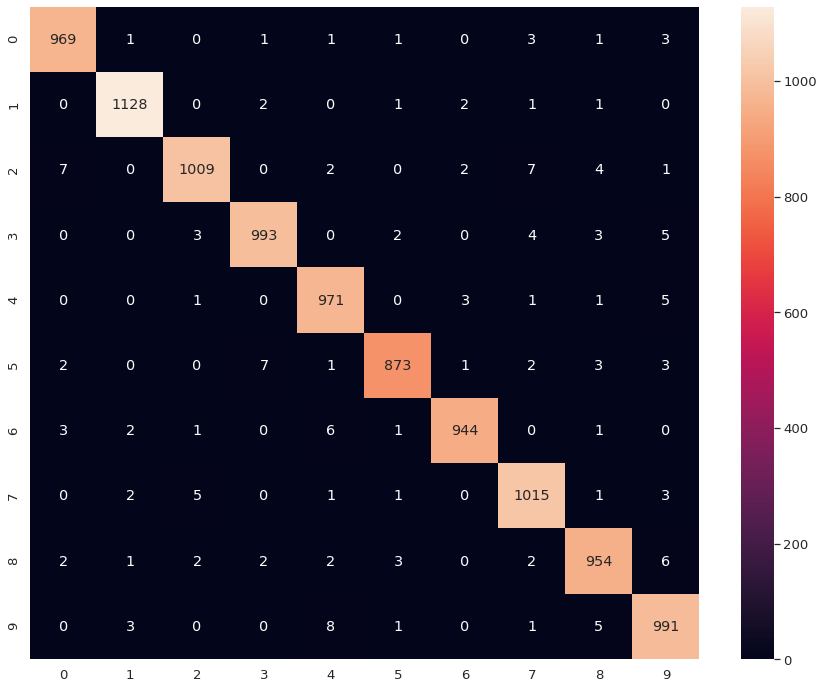

In [25]:
import seaborn as sns

plt.figure(figsize = (15,12))
sns.set(font_scale=1.2)
sns.heatmap(c_mat,annot=True,fmt='d')

Save the Model

In [27]:
model.save('mnist.h5')

Inferences :

> 0s are more prone to be misclassified as 9

> 2s are more prone to be misclassified as 7,8 and 0

> 3s are more prone to be misclassified as 8 and 9

> 4s are more prone to be misclassified as 9

> 5s are more prone to be misclassified as 3

> 6s are more prone to be misclassified as 4

> 7s are more prone to be misclassified as 2

> 8s are more prone to be misclassified as 9

> 9s are more prone to be misclassified as 8 and 4

Most misclassifications happened for 2 3 5 and 8













